## Imports

In [29]:
import cv2
import numpy as np
import random
import os
import matplotlib.pyplot as plt

## Main Code
Here, we read camera feed and capture face after detection in 32x32 array format in shape 3

In [30]:
train_dir = 'cropped_images/train'
valid_dir = 'cropped_images/valid'
test_dir = 'cropped_images/test'


img_pixels = 227

face_cascade = cv2.CascadeClassifier("haar cascades/haarcascade_frontalface_default.xml")
#face_cascade = cv2.CascadeClassifier("haar cascades/haarcascade_profileface.xml")

masked_cascade = cv2.CascadeClassifier("haar cascades/haarcascade_frontalface_default.xml")

cap = cv2.VideoCapture(0)

Save non-masked train dataset

In [60]:
while True:
    ret, img = cap.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        crop_image = img[y+2:y+h-2,x+2:x+w-2]
        crop_image = cv2.resize(crop_image,(img_pixels,img_pixels),interpolation = cv2.INTER_LINEAR)
        old_images = os.listdir(os.path.join(train_dir,'non-masked'))
        cv2.imwrite(f"{train_dir}/non-masked/{len(old_images)+1}_{x}_{y}.jpg",crop_image)
    cv2.imshow('Face detection',img)
    k = cv2.waitKey(30) & 0xff
    if k==27:
        break

cap.release()
cv2.destroyAllWindows()

Save masked train dataset

In [55]:
while True:
    ret, img = cap.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = masked_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        crop_image = img[y+2:y+h-2,x+2:x+w-2]
        crop_image = cv2.resize(crop_image,(img_pixels,img_pixels),interpolation = cv2.INTER_LINEAR)
        old_images = os.listdir(os.path.join(train_dir,'masked'))
        cv2.imwrite(f"{train_dir}/masked/{len(old_images)+1}_{x}_{y}.jpg",crop_image)
    cv2.imshow('Face detection',img)
    k = cv2.waitKey(30) & 0xff
    if k==27:
        break

cap.release()
cv2.destroyAllWindows()

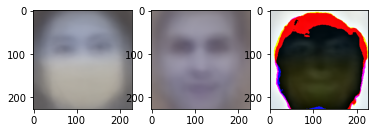

In [32]:
face_datas = []
for face in os.listdir(train_dir+'/masked'):
    face_datas.append(cv2.imread(os.path.join(train_dir+'/masked',face)))
face_datas = np.array(face_datas)

mean_face_masked = np.mean(face_datas,axis=0)

plt.subplot(1,3,1)
plt.imshow(mean_face_masked.astype('uint8'))


face_datas = []
for face in os.listdir(train_dir+'/non-masked'):
    face_datas.append(cv2.imread(os.path.join(train_dir+'/non-masked',face)))
face_datas = np.array(face_datas)

mean_face_non_masked = np.mean(face_datas,axis=0)

plt.subplot(1,3,2)
plt.imshow(mean_face_non_masked.astype('uint8'))


mean_diff = mean_face_masked - mean_face_non_masked
plt.subplot(1,3,3)
plt.imshow(mean_diff.astype('uint8'))

In [5]:
import cv2
import numpy as np
mydir = 'D:\\necessary for the CITY\\7th Semester\\Final-Term Course Files\\CVPR\\codes\\Project_MaskDetection\\archive2\\data\\without_mask'
len(os.listdir(mydir))
c = 0
write_dir = 'cropped_images\\train\\non-masked'
for image in os.listdir(mydir):
    try:
        img = cv2.imread(os.path.join(mydir, image))
        img = cv2.resize(img,(227,227),interpolation = cv2.INTER_LINEAR)
        cv2.imwrite(f"{write_dir}\\{len(os.listdir(write_dir))+1}.jpg",img)
        c+=1
        if(c==500):
            break
    except Exception as e:
        pass